In [1]:
from data import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklego.meta import ZeroInflatedRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [2]:
df = read_data(is_small=False) 
#df = read_data() 

df_X = df.drop(columns=['tot_crash_count', 'crash'])
df_y = df['tot_crash_count']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

zir = ZeroInflatedRegressor(
    classifier=RandomForestClassifier(random_state=1, n_jobs=-1),
    regressor=RandomForestRegressor(random_state=1, n_jobs=-1)
)

In [3]:
zir.fit(X_train, y_train)

ZeroInflatedRegressor(classifier=RandomForestClassifier(n_jobs=-1,
                                                        random_state=1),
                      regressor=RandomForestRegressor(n_jobs=-1,
                                                      random_state=1))

In [4]:
y_val_pred = zir.predict(X_val)
y_train_pred = zir.predict(X_train)

print('rmse train:', mean_squared_error(y_train, y_train_pred, squared=False))
print('r2_score train:', r2_score(y_train, y_train_pred))
print('rmse val:', mean_squared_error(y_val, y_val_pred, squared=False))
print('r2_score val:', r2_score(y_val, y_val_pred))

rmse train: 3.672268965772287
r2_score train: 0.9439762450242799
rmse val: 11.637687875197132
r2_score val: 0.46685687420923716


Text(0, 0.5, 'Prediction')

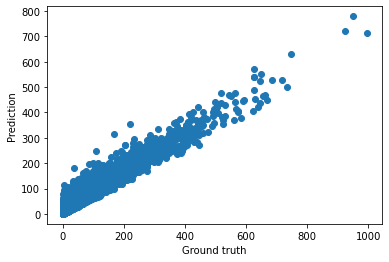

In [5]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Ground truth")
plt.ylabel("Prediction")

Text(0, 0.5, 'Prediction')

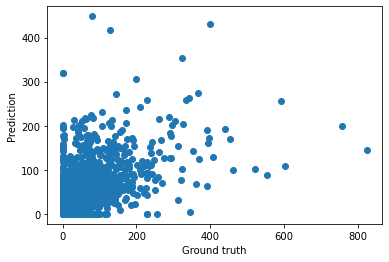

In [6]:
plt.scatter(y_val, y_val_pred)
plt.xlabel("Ground truth")
plt.ylabel("Prediction")

In [7]:
# random forest regression
rf_reg = RandomForestRegressor(random_state=1, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [8]:
y_train_pred = rf_reg.predict(X_train)
y_val_pred = rf_reg.predict(X_val)

print('rmse train:', mean_squared_error(y_train, y_train_pred, squared=False))
print('r2_score train:', r2_score(y_train, y_train_pred))
print('rmse val:', mean_squared_error(y_val, y_val_pred, squared=False))
print('r2_score val:', r2_score(y_val, y_val_pred))

rmse train: 3.9902005036537167
r2_score train: 0.9338556600204282
rmse val: 11.41522665590214
r2_score val: 0.4870447468825251


Text(0, 0.5, 'Prediction')

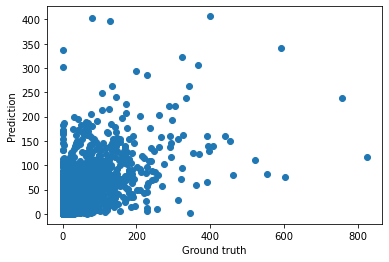

In [9]:
plt.scatter(y_val, rf_reg.predict(X_val))
plt.xlabel("Ground truth")
plt.ylabel("Prediction")

In [10]:
importances = rf_reg.feature_importances_
indices = np.argsort(importances)
features = list(X_train.columns)

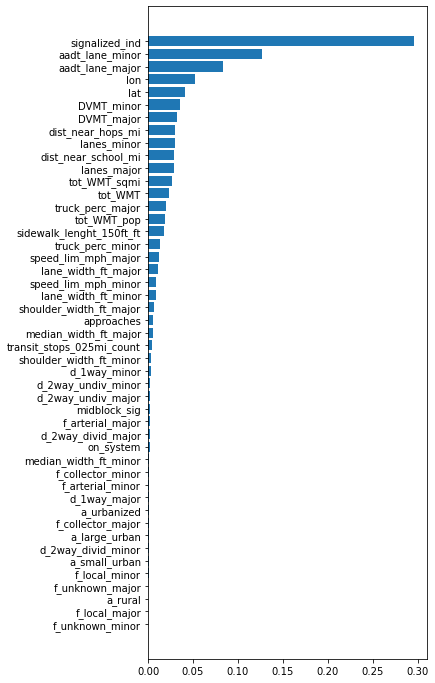

In [11]:
plt.figure(figsize=(5,12))
plt.barh(range(len(indices)), importances[indices]);
plt.yticks(range(len(indices)), [features[i] for i in indices]);

In [12]:
# try another parameter for random forest regression
rf_reg = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=200)
rf_reg.fit(X_train, y_train)

y_train_pred = rf_reg.predict(X_train)
y_val_pred = rf_reg.predict(X_val)

print('rmse train:', mean_squared_error(y_train, y_train_pred, squared=False))
print('r2_score train:', r2_score(y_train, y_train_pred))
print('rmse val:', mean_squared_error(y_val, y_val_pred, squared=False))
print('r2_score val:', r2_score(y_val, y_val_pred))

rmse train: 3.9521055338038895
r2_score train: 0.9351126085687284
rmse val: 11.378303587078307
r2_score val: 0.4903577343036517


In [13]:
# try another parameter for random forest regression
rf_reg = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=50)
rf_reg.fit(X_train, y_train)

y_train_pred = rf_reg.predict(X_train)
y_val_pred = rf_reg.predict(X_val)

print('rmse train:', mean_squared_error(y_train, y_train_pred, squared=False))
print('r2_score train:', r2_score(y_train, y_train_pred))
print('rmse val:', mean_squared_error(y_val, y_val_pred, squared=False))
print('r2_score val:', r2_score(y_val, y_val_pred))

rmse train: 4.085328185955287
r2_score train: 0.930664260840821
rmse val: 11.479730653999644
r2_score val: 0.4812312576069806
